In [81]:
import traceback
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split

Problem Statement: To check who survived into Titanic incident

## data Gathering

In [2]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

# Data Analysis & preparation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.PassengerId

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [7]:
df.Survived.unique()

array([0, 1, 2, 4], dtype=int64)

In [10]:
df.loc[(df.Survived==2) | (df.Survived==4)]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,25,2,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,NaN,S
26,27,4,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.225,NaN,C


In [11]:
df.Gender.value_counts()

male      577
female    314
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

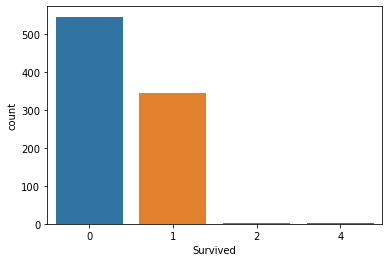

In [12]:
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

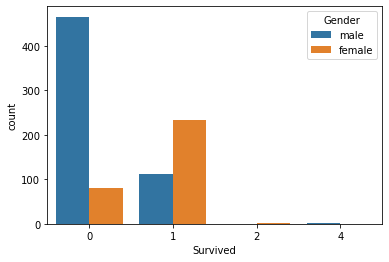

In [13]:
sns.countplot(x = 'Survived', data =df, hue='Gender')

<AxesSubplot:xlabel='Survived', ylabel='count'>

<AxesSubplot:xlabel='Survived', ylabel='count'>

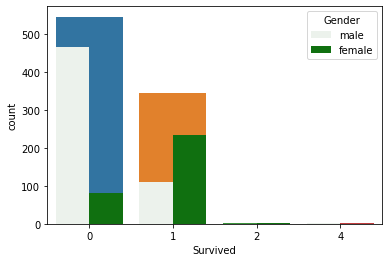

In [14]:
display(sns.countplot(x = 'Survived', data =df))
display(sns.countplot(x = 'Survived', data =df, hue='Gender',color='Green'))

<AxesSubplot:xlabel='Survived', ylabel='count'>

<AxesSubplot:xlabel='Survived', ylabel='count'>

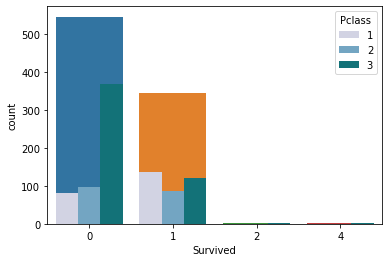

In [20]:
display(sns.countplot(x = 'Survived', data =df))
display(sns.countplot(x = 'Survived', data =df, hue='Pclass',palette='PuBuGn'))

In [22]:
df.Survived.replace({2:1,4:0},inplace=True)
df.Gender.replace({'female':0,'male':1},inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [25]:
df.Age.fillna(df.Age.mean(),inplace=True)

In [27]:
df.Ticket.nunique()

681

In [28]:
df.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

<AxesSubplot:xlabel='Fare'>

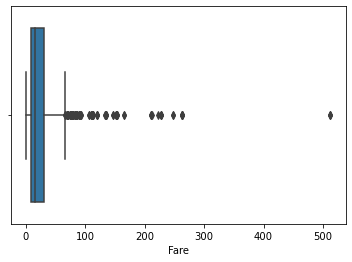

In [30]:
sns.boxplot(x = 'Fare',data=df)

In [32]:
df[df.Fare>200].shape

(20, 12)

In [33]:
df = df[df.Fare<200]
df.shape

(871, 12)

<AxesSubplot:>

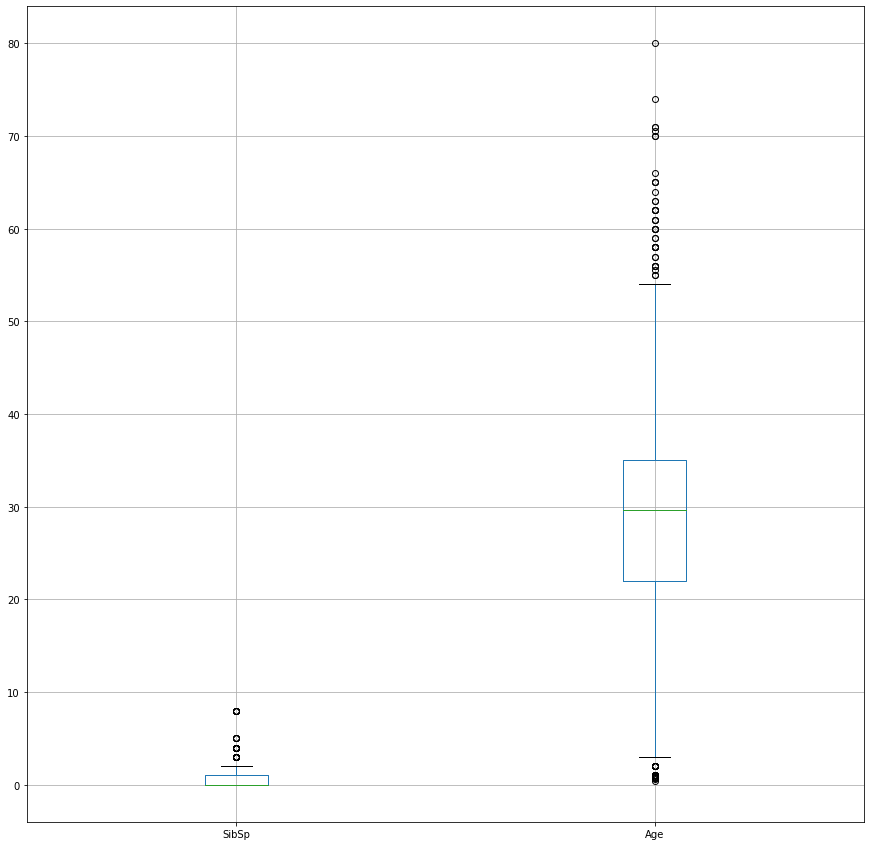

In [35]:
plt.figure(figsize=(15,15))
df.boxplot(column=['SibSp','Age'])

In [37]:
df[df.SibSp>2].shape

(43, 12)

In [39]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [41]:
df.Embarked.value_counts()

S    636
C    156
Q     77
Name: Embarked, dtype: int64

In [42]:
df.Embarked.isna().sum()

2

In [43]:
df.loc[df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN


In [54]:
df[(df['Survived']==1) & (df['Pclass']==1) & (df['Gender']==0)]['Embarked'].value_counts()

S    41
C    35
Q     1
Name: Embarked, dtype: int64

In [55]:
df.Embarked.value_counts()

S    636
C    156
Q     77
Name: Embarked, dtype: int64

In [56]:
df.Embarked.fillna('S',inplace=True)

c:\Users\Pratik\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [57]:
df.Embarked.value_counts()

S    638
C    156
Q     77
Name: Embarked, dtype: int64

In [58]:
df.Embarked.replace({'S':0,'C':1,'Q':2},inplace=True)

c:\Users\Pratik\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  871 non-null    int64  
 1   Survived     871 non-null    int64  
 2   Pclass       871 non-null    int64  
 3   Name         871 non-null    object 
 4   Gender       871 non-null    int64  
 5   Age          871 non-null    float64
 6   SibSp        871 non-null    int64  
 7   Parch        871 non-null    int64  
 8   Ticket       871 non-null    object 
 9   Fare         871 non-null    float64
 10  Cabin        187 non-null    object 
 11  Embarked     871 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 88.5+ KB


In [61]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [62]:
df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)

c:\Users\Pratik\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  871 non-null    int64  
 1   Pclass    871 non-null    int64  
 2   Gender    871 non-null    int64  
 3   Age       871 non-null    float64
 4   SibSp     871 non-null    int64  
 5   Parch     871 non-null    int64  
 6   Fare      871 non-null    float64
 7   Embarked  871 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 61.2 KB


## Splitting Data

In [64]:
from random import random


x = df.drop('Survived',axis=1)
y = df.Survived

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=52)

# creating model instance

In [65]:
log_reg = LogisticRegression()

In [66]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [67]:
y_pred = log_reg.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
      dtype=int64)

# Model Evaluation

In [68]:
cnf_mat = confusion_matrix(y_test,y_pred)
cnf_mat

array([[101,  14],
       [ 19,  41]], dtype=int64)

In [ ]:
      predicted
0          1

TN         FP       0
FN         TP       1        Actuals

In [69]:
accuracy_score(y_test,y_pred)

0.8114285714285714

In [70]:
(101+41)/(14+19+101+41)

0.8114285714285714

In [71]:
precision_score(y_test,y_pred)

0.7454545454545455

In [72]:
41/(41+14)

0.7454545454545455

In [74]:
recall_score(y_test,y_pred)

0.6833333333333333

In [73]:
(41)/(41+19)

0.6833333333333333

In [76]:
f1_score(y_test,y_pred)

0.7130434782608696

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       115
           1       0.75      0.68      0.71        60

    accuracy                           0.81       175
   macro avg       0.79      0.78      0.79       175
weighted avg       0.81      0.81      0.81       175



In [77]:
y_pred_prob = log_reg.predict_proba(x_test)
y_pred_prob

array([[0.96170181, 0.03829819],
       [0.52606445, 0.47393555],
       [0.55118527, 0.44881473],
       [0.91094299, 0.08905701],
       [0.912039  , 0.087961  ],
       [0.51558586, 0.48441414],
       [0.85293868, 0.14706132],
       [0.63370463, 0.36629537],
       [0.87825802, 0.12174198],
       [0.11318679, 0.88681321],
       [0.12304597, 0.87695403],
       [0.81192394, 0.18807606],
       [0.89215581, 0.10784419],
       [0.2803968 , 0.7196032 ],
       [0.96947029, 0.03052971],
       [0.68271036, 0.31728964],
       [0.10686818, 0.89313182],
       [0.46878923, 0.53121077],
       [0.76231554, 0.23768446],
       [0.7030896 , 0.2969104 ],
       [0.92523914, 0.07476086],
       [0.91401161, 0.08598839],
       [0.97010337, 0.02989663],
       [0.86187792, 0.13812208],
       [0.93039655, 0.06960345],
       [0.77292868, 0.22707132],
       [0.29786619, 0.70213381],
       [0.84307674, 0.15692326],
       [0.85824604, 0.14175396],
       [0.82959732, 0.17040268],
       [0.

In [78]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
      dtype=int64)

In [79]:
roc_auc_score(y_test,y_pred)

0.7807971014492754

In [82]:
fpr,tpr,thresold=roc_curve(y_test,y_pred)
print(fpr,tpr,thresold)

[0.         0.12173913 1.        ] [0.         0.68333333 1.        ] [2 1 0]


Text(0, 0.5, 'True Positive Rate')

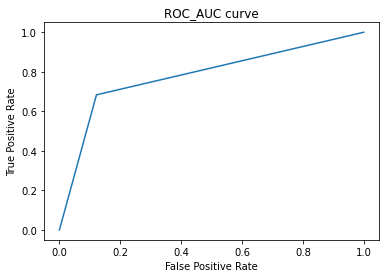

In [83]:
plt.title('ROC_AUC curve')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')